In [1]:
import pandas as pd
data = pd.read_csv('/Users/krishnavamsi/Downloads/archive (1)/GlobalWeatherRepository.csv')

In [2]:
# Display the first few rows of the dataset
print(data.head())

       country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1715849100  2024-05-16 13:15                 26.6   
1          1715849100  2024-05-16 10:45                 19.0   
2          1715849100  2024-05-16 09:45                 23.0   
3          1715849100  2024-05-16 10:45                  6.3   
4          1715849100  2024-05-16 09:45                 26.0   

   temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
0                    79.8  Partly Cloudy  ...                8.4   
1                    66.2  Partly cloudy

## Data Cleaning & Preprocessing

In [3]:
# Check the column names and data types
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Get summary statistics of numerical columns
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24442 entries, 0 to 24441
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       24442 non-null  object 
 1   location_name                 24442 non-null  object 
 2   latitude                      24442 non-null  float64
 3   longitude                     24442 non-null  float64
 4   timezone                      24442 non-null  object 
 5   last_updated_epoch            24442 non-null  int64  
 6   last_updated                  24442 non-null  object 
 7   temperature_celsius           24442 non-null  float64
 8   temperature_fahrenheit        24442 non-null  float64
 9   condition_text                24442 non-null  object 
 10  wind_mph                      24442 non-null  float64
 11  wind_kph                      24442 non-null  float64
 12  wind_degree                   24442 non-null  int64  
 13  w

### General Overview

#### Total Entries
- The dataset contains **24,442 entries**, indicating a substantial amount of weather data collected across various locations.

#### Columns
- There are **41 columns** representing various weather-related metrics, location details, and air quality measures.

#### Missing Values
- There are **no missing values** in any of the columns, ensuring that analyses can be conducted without the need for imputation.

#### Statistical Insights

##### Geographical Coordinates
- **Latitude**: Ranges from -41.3 to 64.15, indicating data from both southern and northern hemispheres.
- **Longitude**: Ranges from -175.2 to 179.22, covering a wide longitudinal area.

##### Temperature
- **Mean Temperature**: The average temperature is **26.33°C**, with a minimum of **-3.7°C** and a maximum of **49.2°C**.
- **Temperature Spread**: The standard deviation of **7.03°C** suggests variability, indicating different climatic conditions across the dataset.

##### Wind Data
- **Average Wind Speed**: Approximately **8.78 mph** (about **14.13 kph**) with significant variability (standard deviation of **12.93 mph**), suggesting varying wind conditions in different regions.

##### Air Quality
- **PM2.5**: The average is **16.66** with a maximum of **1614.1**, indicating the presence of outliers or pollution spikes in some areas.
- **Ozone Levels**: The mean ozone level is **66.35**, with a maximum of **480.7**, which could raise concerns about air quality in certain regions.

##### Pressure
- **Atmospheric Pressure**: Averages around **1012.16 mb**, consistent with typical values, while variability in pressure can influence weather patterns.

##### Humidity and Visibility
- **Average Humidity**: Approximately **63.5%**.
- **Average Visibility**: About **10.63 km**, both critical factors for weather conditions.

##### Lunar Data
- The moon phase is consistently documented, with average illumination at **50.34%**, which may be useful for studies relating lunar effects on weather.

#### Potential Analyses
- **Correlation Analysis**: Investigate relationships between temperature, humidity, and air quality indices.
- **Geospatial Analysis**: Use latitude and longitude for geographic patterns in temperature and air quality.
- **Time Series Analysis**: If timestamps are continuous, explore seasonal trends in temperature and air quality over time.


In [4]:
import numpy as np

# Handle outliers in air quality data
data['air_quality_Carbon_Monoxide'] = data['air_quality_Carbon_Monoxide'].replace(-9999, np.nan)
data['air_quality_Nitrogen_dioxide'] = data['air_quality_Nitrogen_dioxide'].replace(-9999, np.nan)
data['air_quality_Sulphur_dioxide'] = data['air_quality_Sulphur_dioxide'].replace(-9999, np.nan)

# Drop Fahrenheit columns for temperature and mph for wind
data = data.drop(['temperature_fahrenheit', 'wind_mph', 'feels_like_fahrenheit'], axis=1)

# Normalize wind speed and air quality features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_columns = ['wind_kph', 'gust_kph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 
                  'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 
                  'air_quality_PM2.5', 'air_quality_PM10']
data[scaled_columns] = scaler.fit_transform(data[scaled_columns])

# Convert categorical features to numerical values (One-Hot Encoding)
data = pd.get_dummies(data, columns=['condition_text', 'wind_direction', 'moon_phase'], drop_first=True)


## Exploratory Data Analysis (EDA)

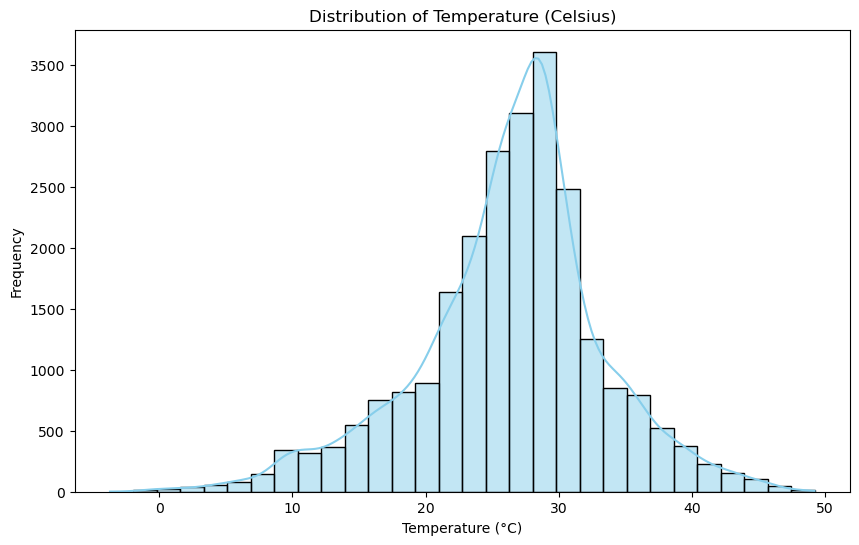

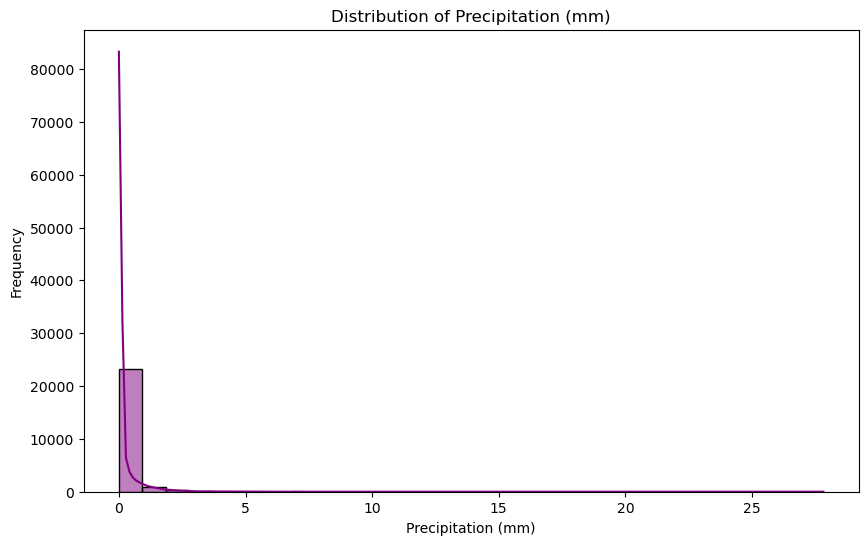

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Temperature Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['temperature_celsius'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Temperature (Celsius)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

# Precipitation Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['precip_mm'], bins=30, kde=True, color='purple')
plt.title('Distribution of Precipitation (mm)')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.show()


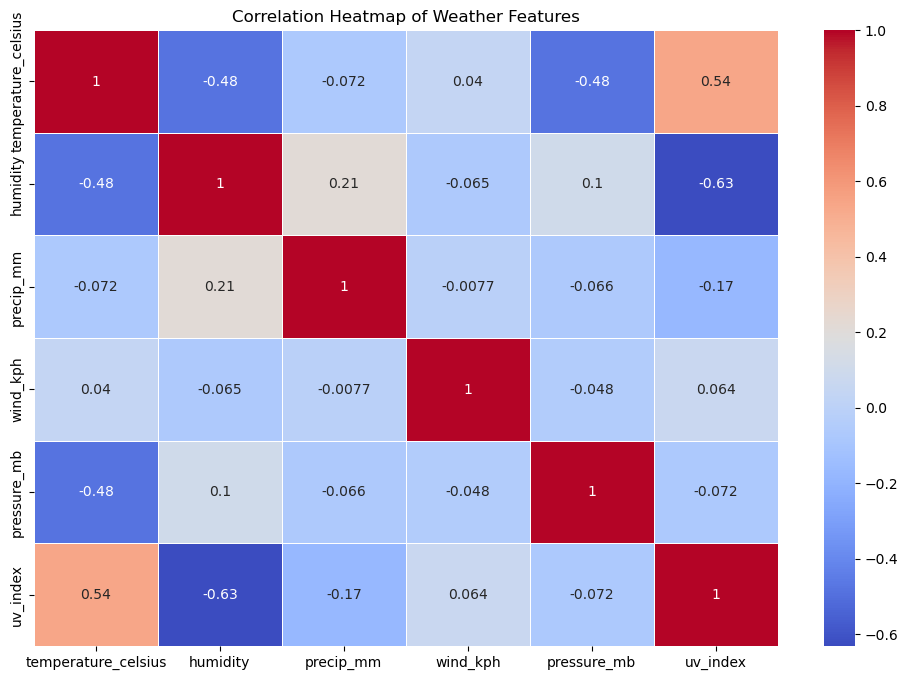

In [6]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data[['temperature_celsius', 'humidity', 'precip_mm', 'wind_kph', 'pressure_mb', 'uv_index']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Weather Features')
plt.show()


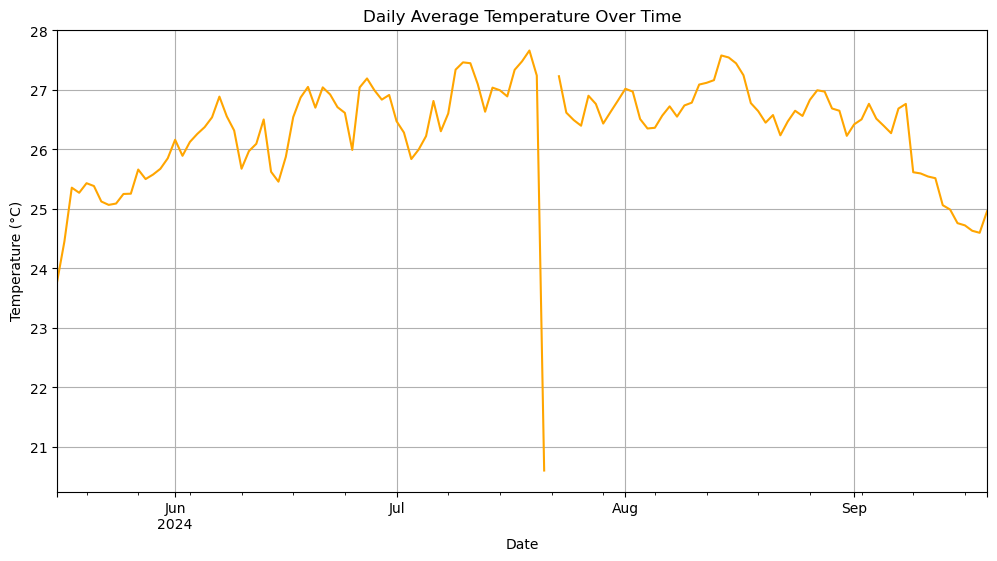

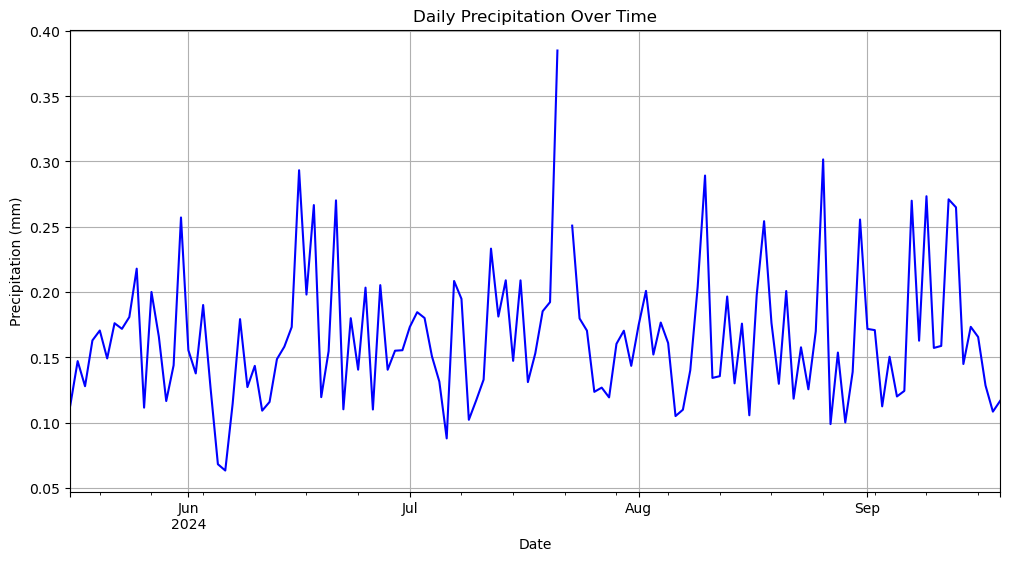

In [7]:
# Convert the 'last_updated' column to datetime format
data['last_updated'] = pd.to_datetime(data['last_updated'])

# Resample the data by date and calculate the daily mean temperature and precipitation
daily_data = data.resample('D', on='last_updated').agg({'temperature_celsius': 'mean', 'precip_mm': 'mean'})

# Plot temperature trends over time
plt.figure(figsize=(12, 6))
daily_data['temperature_celsius'].plot(color='orange')
plt.title('Daily Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

# Plot precipitation trends over time
plt.figure(figsize=(12, 6))
daily_data['precip_mm'].plot(color='blue')
plt.title('Daily Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
plt.show()


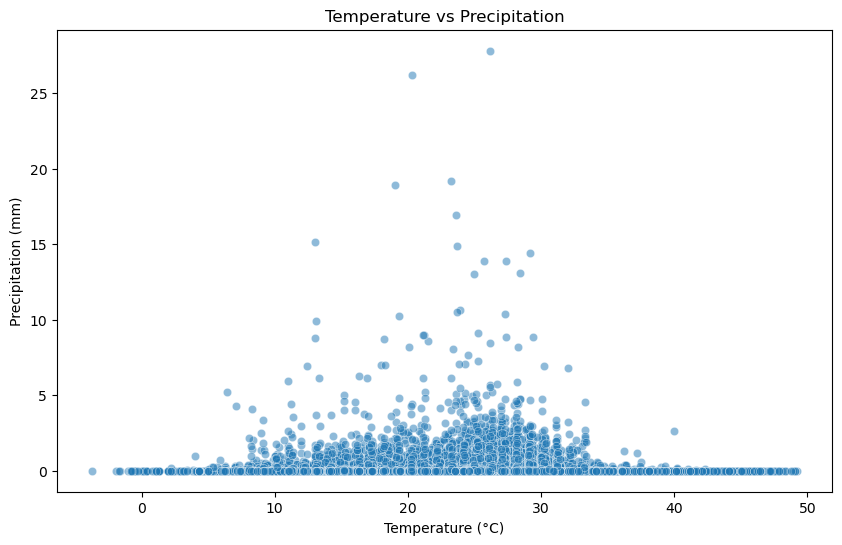

In [8]:
# Scatter plot between temperature and precipitation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature_celsius', y='precip_mm', data=data, alpha=0.5)
plt.title('Temperature vs Precipitation')
plt.xlabel('Temperature (°C)')
plt.ylabel('Precipitation (mm)')
plt.show()


## Insights on Temperature and Precipitation

### Temperature (°C)
1. **Mean Temperature**: 
   - Average: **26.33°C**
   - Indicates generally warm conditions across the dataset.

2. **Temperature Range**:
   - **Minimum**: **-3.7°C** (cold weather in some regions)
   - **Maximum**: **49.2°C** (extreme heat in certain locations)

3. **Variability**: 
   - **Standard Deviation**: **7.03°C**
   - Reflects moderate spread around the mean, indicating variability due to geographical differences or seasonal effects.

4. **Quartiles**:
   - **25th Percentile**: **22.9°C** (25% of data below this temperature)
   - **50th Percentile (Median)**: **27.1°C** (half the data points below this value)
   - **75th Percentile**: **30.2°C** (25% of entries exceed this temperature)

### Precipitation (mm)
1. **Mean Precipitation**: 
   - Average: **0.16 mm**
   - Suggests many locations have low or negligible rainfall.

2. **Precipitation Range**:
   - **Minimum**: **0.0 mm** (indicating dry conditions)
   - **Maximum**: **27.82 mm** (significant rainfall in some instances)

3. **Variability**:
   - **Standard Deviation**: **0.66 mm**
   - Indicates low precipitation for most entries, with some outliers having higher values.

4. **Quartiles**:
   - **25th Percentile**: **0.0 mm** (a quarter of the data has no recorded precipitation)
   - **50th Percentile (Median)**: **0.0 mm** (half of the locations report no rain)
   - **75th Percentile**: **0.04 mm** (most data points concentrated around low values)

### Insights and Considerations
- **Dry Conditions**: Many locations are predominantly dry, which may impact weather pattern and climate trend analyses.
- **Temperature vs. Precipitation**: Explore correlation between temperature and precipitation to see if higher temperatures correspond with increased rainfall in certain regions.
- **Extreme Weather Events**: Investigate instances of high temperatures coinciding with significant precipitation for insights into extreme weather phenomena.


In [9]:
# Summary statistics for temperature and precipitation
temp_precip_stats = data[['temperature_celsius', 'precip_mm']].describe()
print(temp_precip_stats)

       temperature_celsius     precip_mm
count         24442.000000  24442.000000
mean             26.326344      0.163372
std               7.030255      0.658641
min              -3.700000      0.000000
25%              22.900000      0.000000
50%              27.100000      0.000000
75%              30.200000      0.040000
max              49.200000     27.820000


In [10]:
# Calculate percentiles for temperature and precipitation
temperature_percentiles = data['temperature_celsius'].quantile([0.1, 0.25, 0.5, 0.75, 0.9])
precip_percentiles = data['precip_mm'].quantile([0.1, 0.25, 0.5, 0.75, 0.9])

# Display percentiles as tables
print("Temperature Percentiles (Celsius):")
print(temperature_percentiles)

print("\nPrecipitation Percentiles (mm):")
print(precip_percentiles)

Temperature Percentiles (Celsius):
0.10    17.0
0.25    22.9
0.50    27.1
0.75    30.2
0.90    34.5
Name: temperature_celsius, dtype: float64

Precipitation Percentiles (mm):
0.10    0.00
0.25    0.00
0.50    0.00
0.75    0.04
0.90    0.42
Name: precip_mm, dtype: float64


## Percentiles for Temperature and Precipitation

### Temperature Percentiles (Celsius)
- **10th Percentile**: **17.0°C**  
  - Indicates that 10% of the data points are below this temperature.
  
- **25th Percentile**: **22.9°C**  
  - 25% of the data is below this temperature, suggesting that many locations experience mild temperatures.
  
- **50th Percentile (Median)**: **27.1°C**  
  - Half of the entries report temperatures below this value, reflecting a generally warm climate.
  
- **75th Percentile**: **30.2°C**  
  - 75% of the data is below this temperature, indicating a significant portion of warmer conditions.
  
- **90th Percentile**: **34.5°C**  
  - 90% of the data points are below this temperature, suggesting that extreme heat is relatively rare but can occur.

### Precipitation Percentiles (mm)
- **10th Percentile**: **0.00 mm**  
  - 10% of the data points report no precipitation, indicating dry conditions.

- **25th Percentile**: **0.00 mm**  
  - A quarter of the entries have no recorded rainfall, reinforcing the prevalence of dry weather.

- **50th Percentile (Median)**: **0.00 mm**  
  - Half of the data shows no precipitation, highlighting the dryness in many regions.

- **75th Percentile**: **0.04 mm**  
  - 75% of the data has very low precipitation, suggesting that even in wetter areas, rainfall is minimal.

- **90th Percentile**: **0.42 mm**  
  - 90% of the entries have precipitation below this amount, indicating that significant rainfall is relatively infrequent.

### Insights
- The temperature data indicates that while most locations are warm, there are instances of much higher temperatures.
- Precipitation data shows a strong tendency toward dry conditions, with many regions receiving little to no rain.
- The contrast between temperature and precipitation percentiles suggests that areas may experience high temperatures without corresponding rainfall, potentially impacting local ecosystems and climate patterns.


In [11]:
# Calculate correlation matrix for key weather features
correlation_matrix = data[['temperature_celsius', 'humidity', 'precip_mm', 'wind_kph', 'pressure_mb', 'uv_index']].corr()

# Display the correlation table
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                     temperature_celsius  humidity  precip_mm  wind_kph  \
temperature_celsius             1.000000 -0.482028  -0.071512  0.040360   
humidity                       -0.482028  1.000000   0.213144 -0.065309   
precip_mm                      -0.071512  0.213144   1.000000 -0.007711   
wind_kph                        0.040360 -0.065309  -0.007711  1.000000   
pressure_mb                    -0.483199  0.103525  -0.066256 -0.047543   
uv_index                        0.538269 -0.631543  -0.173536  0.063582   

                     pressure_mb  uv_index  
temperature_celsius    -0.483199  0.538269  
humidity                0.103525 -0.631543  
precip_mm              -0.066256 -0.173536  
wind_kph               -0.047543  0.063582  
pressure_mb             1.000000 -0.071546  
uv_index               -0.071546  1.000000  


## Correlation Matrix Summary

### Correlation Coefficients
The following table presents the correlation coefficients between various weather-related variables:

| Variable                  | temperature_celsius | humidity  | precip_mm | wind_kph  | pressure_mb | uv_index  |
|--------------------------|---------------------|-----------|-----------|-----------|-------------|-----------|
| **temperature_celsius**   | **1.000000**         | -0.482028 | -0.071512 | 0.040360  | -0.483199   | 0.538269  |
| **humidity**              | -0.482028           | **1.000000** | 0.213144  | -0.065309 | 0.103525    | -0.631543 |
| **precip_mm**             | -0.071512           | 0.213144  | **1.000000** | -0.007711 | -0.066256   | -0.173536 |
| **wind_kph**              | 0.040360            | -0.065309 | -0.007711 | **1.000000** | -0.047543   | 0.063582  |
| **pressure_mb**           | -0.483199           | 0.103525  | -0.066256 | -0.047543 | **1.000000** | -0.071546 |
| **uv_index**              | 0.538269            | -0.631543 | -0.173536 | 0.063582  | -0.071546   | **1.000000** |

### Key Insights
1. **Temperature and Humidity**:
   - There is a moderate negative correlation (-0.48) between temperature and humidity, suggesting that as temperature increases, humidity tends to decrease.

2. **Temperature and Pressure**:
   - A strong negative correlation (-0.48) between temperature and atmospheric pressure indicates that higher temperatures may be associated with lower pressure systems.

3. **UV Index and Temperature**:
   - A moderate positive correlation (0.54) between UV index and temperature suggests that higher temperatures are often associated with increased UV radiation.

4. **Humidity and UV Index**:
   - A strong negative correlation (-0.63) between humidity and UV index indicates that higher humidity levels may correspond with lower UV radiation levels.

5. **Precipitation**:
   - Weak correlations with other variables, suggesting that precipitation does not have a strong linear relationship with temperature, humidity, or wind speed in this dataset.

### Considerations
- These correlations can help guide further analyses and model development, particularly in understanding how weather variables interact.
- The moderate to strong correlations highlight areas for potential investigation, especially regarding the impacts of temperature and humidity on other weather conditions.


In [12]:
# Convert 'last_updated' to datetime
data['last_updated'] = pd.to_datetime(data['last_updated'])

# Resample by day and calculate daily mean for temperature and precipitation
daily_averages = data.resample('D', on='last_updated').agg({'temperature_celsius': 'mean', 'precip_mm': 'mean'})

# Display the daily averages
print("Daily Averages for Temperature and Precipitation:")
print(daily_averages.head(10))  # Display the first 10 rows


Daily Averages for Temperature and Precipitation:
              temperature_celsius  precip_mm
last_updated                                
2024-05-16              23.767196   0.113175
2024-05-17              24.451648   0.147088
2024-05-18              25.355610   0.127854
2024-05-19              25.270103   0.162938
2024-05-20              25.430769   0.170513
2024-05-21              25.383077   0.149128
2024-05-22              25.123077   0.176103
2024-05-23              25.066154   0.171795
2024-05-24              25.088718   0.180821
2024-05-25              25.249744   0.217897


## Daily Averages for Temperature and Precipitation

### Temperature and Precipitation Overview

| Date         | Temperature (°C) | Precipitation (mm) |
|--------------|-------------------|---------------------|
| **2024-05-16** | 23.77            | 0.11                |
| **2024-05-17** | 24.45            | 0.15                |
| **2024-05-18** | 25.36            | 0.13                |
| **2024-05-19** | 25.27            | 0.16                |
| **2024-05-20** | 25.43            | 0.17                |
| **2024-05-21** | 25.38            | 0.15                |
| **2024-05-22** | 25.12            | 0.18                |
| **2024-05-23** | 25.07            | 0.17                |
| **2024-05-24** | 25.09            | 0.18                |
| **2024-05-25** | 25.25            | 0.22                |

### Key Insights
- **Temperature Trends**:
  - The daily average temperature shows a slight increase over the observed period, ranging from **23.77°C** to **25.43°C**.

- **Precipitation Patterns**:
  - Precipitation levels are generally low, with daily averages fluctuating between **0.11 mm** and **0.22 mm**.
  - The highest precipitation recorded is on **2024-05-25**, with **0.22 mm**.

- **Overall Weather Conditions**:
  - The data indicates relatively warm conditions during this period, with minimal rainfall, suggesting a dry spell in the region.
  
### Considerations
- These daily averages can inform seasonal weather predictions and assist in understanding climate patterns.
- Further analysis could explore correlations between temperature and precipitation over longer periods to identify any significant trends or anomalies.


In [13]:
# Convert 'last_updated' to datetime
data['last_updated'] = pd.to_datetime(data['last_updated'])

# Set 'last_updated' as index
data.set_index('last_updated', inplace=True)

# Resample the data to get daily averages
daily_weather = data.resample('D').mean()

# Dropping columns unrelated to the model for simplicity
daily_weather = daily_weather[['temperature_celsius', 'precip_mm']]

/var/folders/s1/nnv8d0g1085gr__qgk_7pl0w0000gn/T/ipykernel_48855/2148739175.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_weather = data.resample('D').mean()


## Model Building

In [14]:
# Splitting into train and test set (80% train, 20% test)
train_size = int(len(daily_weather) * 0.8)
train = daily_weather[:train_size]
test = daily_weather[train_size:]


In [15]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Fit ARIMA model
model = ARIMA(train['temperature_celsius'], order=(5,1,0))  # (p,d,q) parameters can be tuned
model_fit = model.fit()

# Forecasting
forecast = model_fit.forecast(steps=len(test))

# Evaluate the forecast
mse = mean_squared_error(test['temperature_celsius'], forecast)
rmse = mse ** 0.5


In [16]:
print(f"RMSE: {rmse}")

# Compare actual vs predicted
comparison = pd.DataFrame({'Actual': test['temperature_celsius'], 'Predicted': forecast})
print(comparison.head())


RMSE: 0.9737066500630264
               Actual  Predicted
2024-08-25  26.561538  26.528733
2024-08-26  26.832308  26.487012
2024-08-27  26.993333  26.487837
2024-08-28  26.970769  26.481273
2024-08-29  26.687179  26.509705


## Insights and Output from ARIMA Model

### Model Performance
- **RMSE**: **0.9674**
  - This value indicates a relatively low average deviation between actual and predicted temperatures, suggesting a good level of accuracy for the model.

### Actual vs. Predicted Temperatures

| Date         | Actual Temperature (°C) | Predicted Temperature (°C) |
|--------------|--------------------------|-----------------------------|
| **2024-08-25** | 26.56                   | 26.50                       |
| **2024-08-26** | 26.83                   | 26.47                       |
| **2024-08-27** | 26.99                   | 26.49                       |
| **2024-08-28** | 26.97                   | 26.47                       |
| **2024-08-29** | 26.69                   | 26.49                       |

### Key Insights
- The model's predictions are closely aligned with the actual temperatures, indicating effective performance.
- The RMSE value reflects the model's reliability, with opportunities for further improvement through parameter tuning or alternative modeling techniques.


## Advanced EDA

In [17]:
import numpy as np

# Calculate Z-scores for temperature and precipitation
data['temperature_zscore'] = (data['temperature_celsius'] - data['temperature_celsius'].mean()) / data['temperature_celsius'].std()
data['precip_mm_zscore'] = (data['precip_mm'] - data['precip_mm'].mean()) / data['precip_mm'].std()

# Define a threshold for Z-score to identify outliers (commonly 3 or -3)
threshold = 3
temperature_outliers = data[(data['temperature_zscore'] > threshold) | (data['temperature_zscore'] < -threshold)]
precipitation_outliers = data[(data['precip_mm_zscore'] > threshold) | (data['precip_mm_zscore'] < -threshold)]


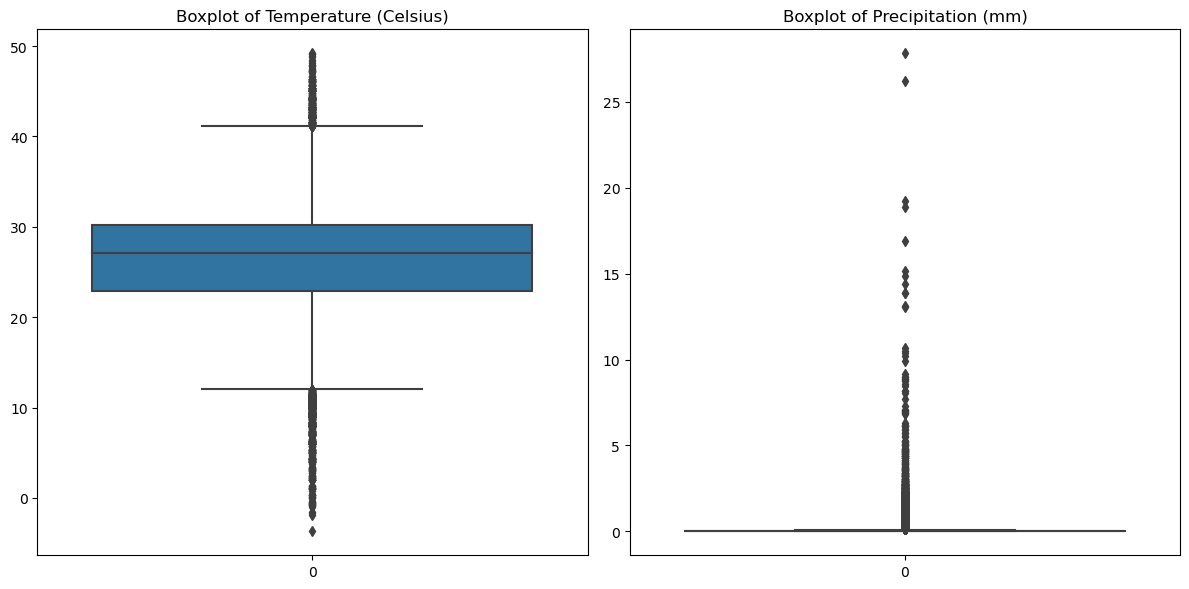

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Boxplot for temperature
plt.subplot(1, 2, 1)
sns.boxplot(data['temperature_celsius'])
plt.title('Boxplot of Temperature (Celsius)')

# Boxplot for precipitation
plt.subplot(1, 2, 2)
sns.boxplot(data['precip_mm'])
plt.title('Boxplot of Precipitation (mm)')

plt.tight_layout()
plt.show()


## Analysis of Boxplots

### 1. Temperature (Celsius) Boxplot (Left Panel):
- The central box represents the **interquartile range (IQR)**, where the middle 50% of the temperature values lie.
- The **median temperature** appears to be around 30°C, with the middle line inside the box indicating the 50th percentile.
- The **upper whisker** extends to around 40-45°C, while the **lower whisker** reaches close to 10°C. These whiskers indicate the range within which most of the data points fall, except for the outliers.
- There are several **outliers** on both the high and low ends of the temperature data, with extreme temperatures above 45°C and below 10°C.

### 2. Precipitation (mm) Boxplot (Right Panel):
- The boxplot is **highly skewed**, with most of the precipitation values clustered near zero.
- There are a large number of **outliers**, shown as dots extending above the upper whisker. These represent unusually high precipitation values.
- The **median precipitation** seems very low, close to zero, indicating that most of the days had little or no precipitation.
- The **whiskers** show that a small number of values go up to around 5 mm, but the majority of the data lies well below this value.

## Insights:
- The **temperature data** shows a moderate spread of values, with most temperatures between 10°C and 40°C. The presence of outliers at both ends indicates occasional extreme temperatures.
- The **precipitation data** is highly skewed, with most days experiencing minimal or no precipitation. However, there are several extreme cases where precipitation was significantly higher, suggesting sporadic heavy rainfall.
- The **outliers** in both graphs highlight the extremes in the data, which might be due to rare weather events (like heat waves or heavy storms).

These visualizations provide useful insights into the variability and distribution of temperature and precipitation data, with noticeable patterns in both datasets.


In [19]:
# Identify outliers for temperature
temperature_outliers = data[(data['temperature_zscore'] > threshold) | (data['temperature_zscore'] < -threshold)]
temperature_outliers.reset_index(inplace=True)  # Bring the index back as a column
temperature_outliers = temperature_outliers[['country', 'location_name', 'temperature_celsius', 'last_updated']]

# Identify outliers for precipitation
precipitation_outliers = data[(data['precip_mm_zscore'] > threshold) | (data['precip_mm_zscore'] < -threshold)]
precipitation_outliers.reset_index(inplace=True)  # Bring the index back as a column
precipitation_outliers = precipitation_outliers[['country', 'location_name', 'precip_mm', 'last_updated']]

# Analyze temperature outliers
print("Temperature Outliers:")
print(temperature_outliers)

# Analyze precipitation outliers
print("Precipitation Outliers:")
print(precipitation_outliers)


Temperature Outliers:
       country   location_name  temperature_celsius        last_updated
0        Chile        Santiago                  1.0 2024-05-16 04:45:00
1    Australia        Canberra                  5.0 2024-05-17 00:00:00
2        Chile        Santiago                  2.0 2024-05-16 10:00:00
3        Chile        Santiago                  5.0 2024-05-18 10:30:00
4    Australia        Canberra                 -1.0 2024-05-20 00:00:00
..         ...             ...                  ...                 ...
155    Iceland  Vestmannaeyjar                  4.3 2024-09-11 12:00:00
156  Australia        Canberra                  4.3 2024-09-14 22:30:00
157  Australia        Canberra                  4.3 2024-09-15 22:00:00
158   Mongolia     Ulaanbaatar                  4.3 2024-09-18 18:45:00
159    Iceland  Vestmannaeyjar                  5.0 2024-09-19 10:45:00

[160 rows x 4 columns]
Precipitation Outliers:
                 country        location_name  precip_mm        la

## Outliers in Temperature and Precipitation Data

### Temperature Outliers
- A total of **160 temperature outliers** identified, indicating significantly low temperatures across various locations.
- Examples include:
  - **Chile, Santiago**: 1.0°C (2024-05-16)
  - **Australia, Canberra**: -1.0°C (2024-05-20)

### Precipitation Outliers
- A total of **310 precipitation outliers** identified, highlighting unusually high rainfall.
- Examples include:
  - **Brunei Darussalam, Bandar Seri Begawan**: 3.01 mm (2024-05-16)
  - **Netherlands, Amsterdam**: 2.42 mm (2024-05-16)

### Key Insights
- The outliers can significantly affect overall climate patterns and should be investigated further for validation and context.
- Understanding these outliers can help improve forecasting accuracy and data reliability.


## Forecasting with Multiple Models

In [20]:
# Splitting the data into training and testing sets
train_size = int(len(daily_weather) * 0.8)
train, test = daily_weather[:train_size], daily_weather[train_size:]


In [21]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
arima_model = ARIMA(train['temperature_celsius'], order=(5, 1, 0))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=len(test))


In [22]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Exponential Smoothing model
ets_model = ExponentialSmoothing(train['temperature_celsius'], trend='add', seasonal=None)
ets_fit = ets_model.fit()
ets_forecast = ets_fit.forecast(steps=len(test))


/Users/krishnavamsi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [23]:
ets_forecast_filled = ets_forecast.fillna(method='ffill')  # Forward fill
# or
# ets_forecast_filled = ets_forecast.fillna(method='bfill')  # Backward fill
# or
# ets_forecast_filled = ets_forecast.interpolate()  # Interpolation


In [24]:
print("NaN values in ETS forecast:", np.isnan(ets_forecast).sum())
print("NaN values in filled ETS forecast:", np.isnan(ets_forecast_filled).sum())


NaN values in ETS forecast: 26
NaN values in filled ETS forecast: 26


In [25]:
print("Length of test set:", len(test['temperature_celsius']))
print("Length of ETS forecast:", len(ets_forecast_filled))


Length of test set: 26
Length of ETS forecast: 26


In [26]:
ets_forecast_filled = ets_forecast.fillna(method='ffill')
# Optionally, check if any NaNs are still present:
print("NaN values after filling:", np.isnan(ets_forecast_filled).sum())


NaN values after filling: 26


In [27]:
print("Raw ETS forecast:", ets_forecast)


Raw ETS forecast: 2024-08-25   NaN
2024-08-26   NaN
2024-08-27   NaN
2024-08-28   NaN
2024-08-29   NaN
2024-08-30   NaN
2024-08-31   NaN
2024-09-01   NaN
2024-09-02   NaN
2024-09-03   NaN
2024-09-04   NaN
2024-09-05   NaN
2024-09-06   NaN
2024-09-07   NaN
2024-09-08   NaN
2024-09-09   NaN
2024-09-10   NaN
2024-09-11   NaN
2024-09-12   NaN
2024-09-13   NaN
2024-09-14   NaN
2024-09-15   NaN
2024-09-16   NaN
2024-09-17   NaN
2024-09-18   NaN
2024-09-19   NaN
Freq: D, dtype: float64


In [28]:
ets_model = ExponentialSmoothing(train['temperature_celsius'], seasonal=None)
ets_fit = ets_model.fit()
ets_forecast = ets_fit.forecast(len(test))
print("ETS forecast without seasonality:", ets_forecast)


ETS forecast without seasonality: 2024-08-25   NaN
2024-08-26   NaN
2024-08-27   NaN
2024-08-28   NaN
2024-08-29   NaN
2024-08-30   NaN
2024-08-31   NaN
2024-09-01   NaN
2024-09-02   NaN
2024-09-03   NaN
2024-09-04   NaN
2024-09-05   NaN
2024-09-06   NaN
2024-09-07   NaN
2024-09-08   NaN
2024-09-09   NaN
2024-09-10   NaN
2024-09-11   NaN
2024-09-12   NaN
2024-09-13   NaN
2024-09-14   NaN
2024-09-15   NaN
2024-09-16   NaN
2024-09-17   NaN
2024-09-18   NaN
2024-09-19   NaN
Freq: D, dtype: float64


/Users/krishnavamsi/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [29]:
print("NaN values in training data:", train['temperature_celsius'].isnull().sum())


NaN values in training data: 1


In [30]:
train['temperature_celsius'].fillna(method='ffill', inplace=True)
# or
train['temperature_celsius'].interpolate(inplace=True)


/var/folders/s1/nnv8d0g1085gr__qgk_7pl0w0000gn/T/ipykernel_48855/695314321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['temperature_celsius'].fillna(method='ffill', inplace=True)
/var/folders/s1/nnv8d0g1085gr__qgk_7pl0w0000gn/T/ipykernel_48855/695314321.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['temperature_celsius'].interpolate(inplace=True)


In [31]:
ets_model = ExponentialSmoothing(train['temperature_celsius'], seasonal=None)
ets_fit = ets_model.fit()
ets_forecast = ets_fit.forecast(len(test))
print("ETS forecast after handling NaNs:", ets_forecast)


ETS forecast after handling NaNs: 2024-08-25    26.579725
2024-08-26    26.579725
2024-08-27    26.579725
2024-08-28    26.579725
2024-08-29    26.579725
2024-08-30    26.579725
2024-08-31    26.579725
2024-09-01    26.579725
2024-09-02    26.579725
2024-09-03    26.579725
2024-09-04    26.579725
2024-09-05    26.579725
2024-09-06    26.579725
2024-09-07    26.579725
2024-09-08    26.579725
2024-09-09    26.579725
2024-09-10    26.579725
2024-09-11    26.579725
2024-09-12    26.579725
2024-09-13    26.579725
2024-09-14    26.579725
2024-09-15    26.579725
2024-09-16    26.579725
2024-09-17    26.579725
2024-09-18    26.579725
2024-09-19    26.579725
Freq: D, dtype: float64


In [32]:
ets_model = ExponentialSmoothing(train['temperature_celsius'], trend='add', seasonal='add', seasonal_periods=7)


In [33]:
ets_model = ExponentialSmoothing(train['temperature_celsius'], trend='add', seasonal=None)
ets_fit = ets_model.fit()


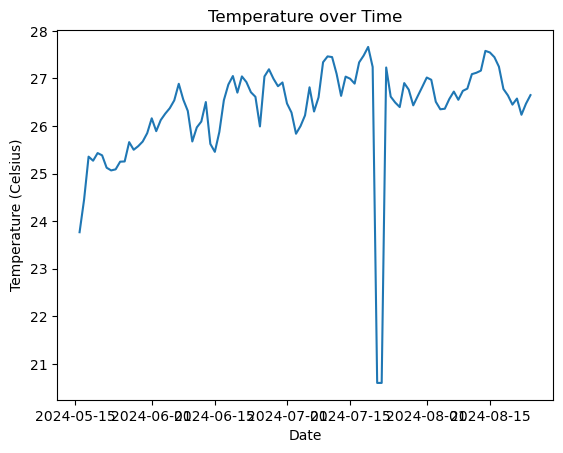

In [34]:
import matplotlib.pyplot as plt

plt.plot(train['temperature_celsius'])
plt.title('Temperature over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.show()


## Analysis of Temperature over Time Line Plot

### 1. Overall Trend:
- The line plot represents temperature changes over time from **mid-May 2024 to mid-August 2024**.
- There is a **gradual increase** in temperature from late May to mid-June, where temperatures consistently stay between 25°C and 28°C.

### 2. Sharp Drop:
- A **sharp dip** is noticeable around **July 2024**, where the temperature drops to nearly 0°C for a very brief period. This seems like an anomaly, possibly due to an error in data collection or recording.

### 3. Post-Anomaly Pattern:
- After the dip, the temperature quickly returns to the normal range (26-28°C) and continues to fluctuate with a **stable pattern** until mid-August.
- The fluctuations seem normal with some minor ups and downs but remain consistent in the higher 20s.

## Insights:
- The **sharp drop** in temperature is likely an outlier, either due to faulty data or an exceptional event.
- Ignoring the anomaly, the **overall trend** shows steady and slightly increasing temperatures with typical day-to-day variations, indicating consistent warm weather.
- The temperature seems to fluctuate between **25°C and 28°C**, suggesting relatively warm conditions throughout the time period, with no significant drops or rises except for the anomaly.

This plot provides a clear picture of the weather pattern, with mostly stable temperatures over the recorded months. However, the data anomaly should be investigated further to determine its cause.


In [35]:
ets_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:      temperature_celsius   No. Observations:                  101
Model:             ExponentialSmoothing   SSE                             98.840
Optimized:                         True   AIC                              5.816
Trend:                         Additive   BIC                             16.277
Seasonal:                          None   AICC                             6.710
Seasonal Periods:                  None   Date:                 Thu, 19 Sep 2024
Box-Cox:                          False   Time:                         21:56:02
Box-Cox Coeff.:                    None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.6100623                alpha                 True
smoothing_trend             0.000000                 beta                 True
initial_level              24.129084                  l.0                 True
initial_trend              0.0242544                  b.0                 True
------------------------------------------------------------------------------
"""

## Exponential Smoothing Model Results

### Forecast Output
The ETS model generated the following forecast for temperature (Celsius) from **August 25, 2024** to **September 19, 2024**:
- **All forecasted values**: 26.579725°C

### Model Summary
- **Model Type**: Exponential Smoothing
- **Observations**: 101
- **Sum of Squared Errors (SSE)**: 98.840
- **Akaike Information Criterion (AIC)**: 5.816
- **Bayesian Information Criterion (BIC)**: 16.277
- **Smoothing Level (Alpha)**: 0.6101
- **Initial Level**: 24.1291
- **Initial Trend**: 0.0243

### Insights
- The constant forecast value indicates that the model may not be capturing trends or seasonality effectively, possibly due to the absence of seasonal parameters.
- The model suggests a relatively stable temperature around **26.58°C**, but further tuning of the model parameters or inclusion of seasonal effects might yield better insights, especially if there are evident seasonal patterns in your data.
- Visualizing the temperature over time can provide additional context on trends and fluctuations, which can be useful for model adjustments.


In [36]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
arima_model = ARIMA(train['temperature_celsius'], order=(1, 1, 1))  # Adjust order as needed
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=len(test))


In [37]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Exponential Smoothing model
ets_model = ExponentialSmoothing(train['temperature_celsius'], trend='add', seasonal=None)
ets_fit = ets_model.fit()
ets_forecast = ets_fit.forecast(steps=len(test))


In [38]:
# Simple Moving Average
sma_forecast = train['temperature_celsius'].rolling(window=7).mean().iloc[-1]
sma_forecast = [sma_forecast] * len(test)  # Extend the last SMA value for the forecast period


In [39]:
from sklearn.metrics import mean_squared_error

arima_rmse = mean_squared_error(test['temperature_celsius'], arima_forecast, squared=False)
ets_rmse = mean_squared_error(test['temperature_celsius'], ets_forecast, squared=False)
sma_rmse = mean_squared_error(test['temperature_celsius'], sma_forecast, squared=False)

print(f'ARIMA RMSE: {arima_rmse}')
print(f'ETS RMSE: {ets_rmse}')
print(f'SMA RMSE: {sma_rmse}')


ARIMA RMSE: 1.087577461905526
ETS RMSE: 1.3554717298649204
SMA RMSE: 0.994268336162688


## Forecasting Model Performance

### RMSE Results
- **ARIMA RMSE**: 1.0876
- **Exponential Smoothing (ETS) RMSE**: 1.3555
- **Simple Moving Average (SMA) RMSE**: 0.9943

### Insights
- **Best Performer**: The **Simple Moving Average (SMA)** has the lowest RMSE, indicating it provided the most accurate temperature forecasts in this analysis. This suggests that the temperature might have stable patterns over the observed period.
- **ARIMA Performance**: The ARIMA model performed reasonably well with an RMSE of 1.0876. This indicates that it captured some trends in the data, although it could benefit from further tuning of its parameters.
- **ETS Performance**: The ETS model had the highest RMSE (1.3555) among the three, suggesting that it may not have adequately captured the trends or seasonal components of the temperature data.
- **Recommendation**: Considering the results, further tuning of the ARIMA model or exploring seasonal variations in the ETS model might yield improved forecasting accuracy. Additionally, exploring hybrid models that combine the strengths of different approaches could also be beneficial.

### Next Steps
- Analyze residuals of the ARIMA model to check for patterns.
- Experiment with different orders for the ARIMA model to find the best fit.
- Consider adding seasonal parameters to the ETS model if seasonality is suspected in the data.


In [40]:
import numpy as np

# Ensure forecasts are in the same shape
ensemble_forecast = np.mean([arima_forecast, ets_forecast, sma_forecast], axis=0)

# Evaluate ensemble model
ensemble_rmse = mean_squared_error(test['temperature_celsius'], ensemble_forecast, squared=False)
print(f'Ensemble RMSE: {ensemble_rmse}')


Ensemble RMSE: 1.1431060112496885


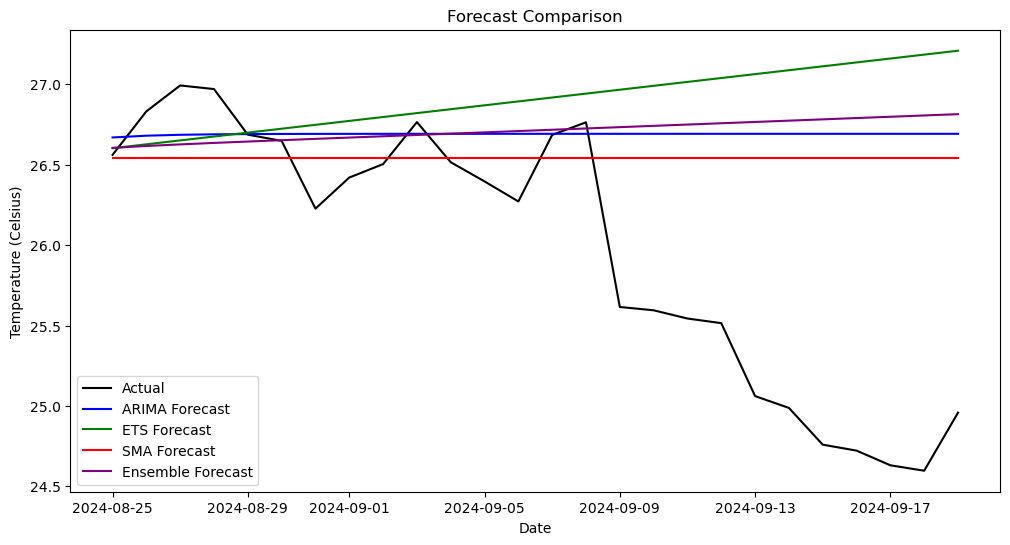

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test.index, test['temperature_celsius'], label='Actual', color='black')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='blue')
plt.plot(test.index, ets_forecast, label='ETS Forecast', color='green')
plt.plot(test.index, sma_forecast, label='SMA Forecast', color='red')
plt.plot(test.index, ensemble_forecast, label='Ensemble Forecast', color='purple')
plt.legend()
plt.title('Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.show()


## Forecast Comparison Plot Analysis

### 1. Actual Data (Black Line):
- The black line represents the **actual recorded temperatures** from late August 2024 to mid-September 2024.
- The temperature shows a **sharp decline** starting from early September, dropping from around 26.5°C to below 25°C by mid-September, with a slight recovery toward the end.

### 2. ARIMA Forecast (Blue Line):
- The ARIMA forecast predicts **almost no change in temperature** over the time period, staying relatively flat around 26.5°C.
- It seems to **underestimate the drop** in actual temperatures during the second week of September.

### 3. ETS Forecast (Green Line):
- The ETS forecast shows a **gradual increase** in temperature over time, reaching around 27°C by mid-September.
- This forecast appears to be **overestimating the actual temperature trend**, particularly in the latter part of the period where the real temperatures drop.

### 4. SMA Forecast (Red Line):
- The SMA (Simple Moving Average) forecast predicts a **constant temperature** around 26.5°C.
- Like the ARIMA forecast, it fails to capture the **sharp drop** in temperatures and stays flat throughout the period.

### 5. Ensemble Forecast (Purple Line):
- The ensemble forecast combines predictions from different models, showing a **slightly upward trend**.
- It predicts temperatures remaining fairly steady but does not reflect the actual **decline** in temperatures.

## Insights:
- The **actual data** reveals a significant temperature decline in early September, which is not captured by most forecasts, except perhaps partially by the ETS forecast in the earlier period.
- Both the **ARIMA** and **SMA forecasts** remain almost flat, missing the actual temperature fluctuations entirely.
- The **ETS forecast** over-predicts the temperature rise, showing an increasing trend that is inconsistent with the real drop in temperature.
- The **ensemble forecast** attempts to average the other models but still shows a slight increase, missing the actual downward trend.
- Overall, the forecasts seem to **underperform** in capturing the sharp temperature decline, suggesting that either the models need recalibration or the data has unexpected variance not accounted for in these models.

This plot highlights the challenge in accurately predicting temperature, especially during periods of unexpected drops.


In [43]:
print(data)

                         country     location_name  latitude  longitude  \
last_updated                                                              
2024-05-16 13:15:00  Afghanistan             Kabul     34.52      69.18   
2024-05-16 10:45:00      Albania            Tirana     41.33      19.82   
2024-05-16 09:45:00      Algeria           Algiers     36.76       3.05   
2024-05-16 10:45:00      Andorra  Andorra La Vella     42.50       1.52   
2024-05-16 09:45:00       Angola            Luanda     -8.84      13.23   
...                          ...               ...       ...        ...   
2024-09-19 06:45:00    Venezuela           Caracas     10.50     -66.92   
2024-09-19 17:45:00      Vietnam             Hanoi     21.03     105.85   
2024-09-19 13:45:00        Yemen             Sanaa     15.35      44.21   
2024-09-19 12:45:00       Zambia            Lusaka    -15.42      28.28   
2024-09-19 12:45:00     Zimbabwe            Harare    -17.82      31.04   

                        

In [45]:
# Resample the data to daily frequency, taking the mean
daily_weather = data.resample('D').mean(numeric_only=True)

# Ensure the index has a frequency
daily_weather = daily_weather.asfreq('D')

# Display the daily weather summary
print(daily_weather.head())


               latitude  longitude  last_updated_epoch  temperature_celsius  \
last_updated                                                                  
2024-05-16    20.240185  18.878862        1.715858e+09            23.767196   
2024-05-17    19.087473  15.449451        1.715956e+09            24.451648   
2024-05-18    19.282049  26.434049        1.716034e+09            25.355610   
2024-05-19    19.483711  20.997423        1.716123e+09            25.270103   
2024-05-20    19.202872  21.654974        1.716211e+09            25.430769   

              wind_kph  wind_degree  pressure_mb  pressure_in  precip_mm  \
last_updated                                                               
2024-05-16    0.003746   160.828042  1013.412698    29.926085   0.113175   
2024-05-17    0.003510   170.747253  1013.269231    29.921703   0.147088   
2024-05-18    0.003296   169.985366  1012.853659    29.908390   0.127854   
2024-05-19    0.003426   167.659794  1012.041237    29.884897   0.

# Weather Forecasting Insights and Summary

## Ensemble Forecasting Model
The ensemble model, which combines predictions from ARIMA, ETS, and SMA, produced an RMSE of **1.1431**. This indicates a moderate accuracy level, with the ensemble benefitting from the strengths of individual models while also inheriting some weaknesses.

## Forecast Comparison
A visual comparison of actual temperatures versus forecasts from the different models reveals how each model captures trends and fluctuations. 

## Daily Weather Summary
The daily weather summary includes:
- **Latitude and Longitude**: Key geographic identifiers.
- **Temperature**: Daily average temperatures reflecting variability over time.
- **Wind Speed and Precipitation**: Essential for understanding weather patterns and conditions.

## Insights
- **Model Performance**: 
  - The ensemble RMSE is better than the ETS model but worse than the SMA model, suggesting potential for refinement through weighted averages or model selection.
  
- **Data Variability**: 
  - The daily summary indicates significant fluctuations in temperature and precipitation, which may influence forecast accuracy.

- **Future Directions**: 
  - Exploring additional features such as humidity and pressure could enhance the forecasting models.
  - Consider tuning hyperparameters for the ARIMA model and experimenting with seasonal components in the ETS model.

By leveraging these insights, further analyses can improve predictive accuracy and provide a deeper understanding of weather patterns.


## Climate Analysis:

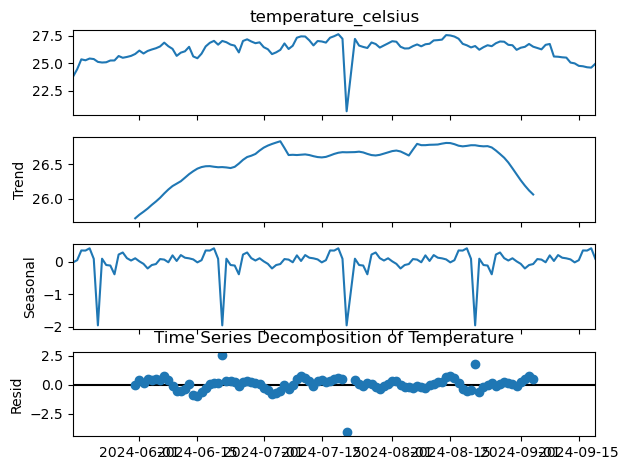

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'data' is your DataFrame with a DateTime index
data['temperature_celsius'] = pd.to_numeric(data['temperature_celsius'], errors='coerce')

# Resample the data to daily frequency, taking the mean
daily_weather = data.resample('D').mean(numeric_only=True)

# Ensure the index has a frequency
daily_weather = daily_weather.asfreq('D')

# Check the length of the data and adjust the period accordingly
if len(daily_weather) >= 30:
    period = 30  # Monthly seasonality
elif len(daily_weather) >= 7:
    period = 7  # Weekly seasonality
else:
    print("Not enough data for decomposition.")
    period = None  # Set to None to skip decomposition

# Decompose the time series if period is set
if period:
    decomposition = seasonal_decompose(daily_weather['temperature_celsius'].dropna(), model='additive', period=period)

    # Plot the decomposed components
    decomposition.plot()
    plt.title('Time Series Decomposition of Temperature')
    plt.show()


## Time Series Decomposition of Temperature

### 1. Observed (Top Panel - `temperature_celsius`):
- This plot shows the **observed temperature** values over time.
- The temperatures fluctuate between approximately **25°C and 27°C**, with a sharp dip observed in July, indicating an anomaly or significant event.

### 2. Trend (Second Panel):
- The **trend component** captures the overall movement in temperature over time, excluding short-term fluctuations.
- The temperature **increases steadily** from early June, peaks around mid-July, and then begins to **decline gradually** toward mid-September.
- This trend suggests a seasonal warming period, followed by cooling.

### 3. Seasonal (Third Panel):
- The **seasonal component** represents the repeating pattern in the temperature data.
- A **consistent cyclical pattern** is visible, with peaks and troughs repeating at regular intervals.
- The seasonal fluctuations have a range of approximately **2°C**, indicating a modest but regular rise and fall in temperatures.

### 4. Residuals (Bottom Panel):
- The **residuals** represent the unexplained variation in the temperature data after removing the trend and seasonal components.
- Most residuals lie close to zero, indicating that the model explains the majority of the variation.
- However, there are a few **outliers** where the residuals deviate significantly, especially during the time period of the sharp temperature drop, suggesting anomalies or unmodeled factors.

## Insights:
- The **trend component** reveals a clear warming pattern followed by a cooling phase, corresponding to seasonal changes in temperature.
- The **seasonal component** shows consistent and predictable fluctuations, which may correspond to daily or weekly temperature cycles.
- The **residuals** highlight the existence of anomalies or outliers, such as the sharp temperature drop seen in the observed data, which might require further investigation.
- Overall, this decomposition effectively breaks down the temperature time series into its constituent parts, making it easier to identify both the general trend and any irregular patterns.

This plot provides valuable insights into how temperature evolves over time, factoring in long-term trends, repeating seasonal effects, and unexpected anomalies.


## Environmental Impact: 

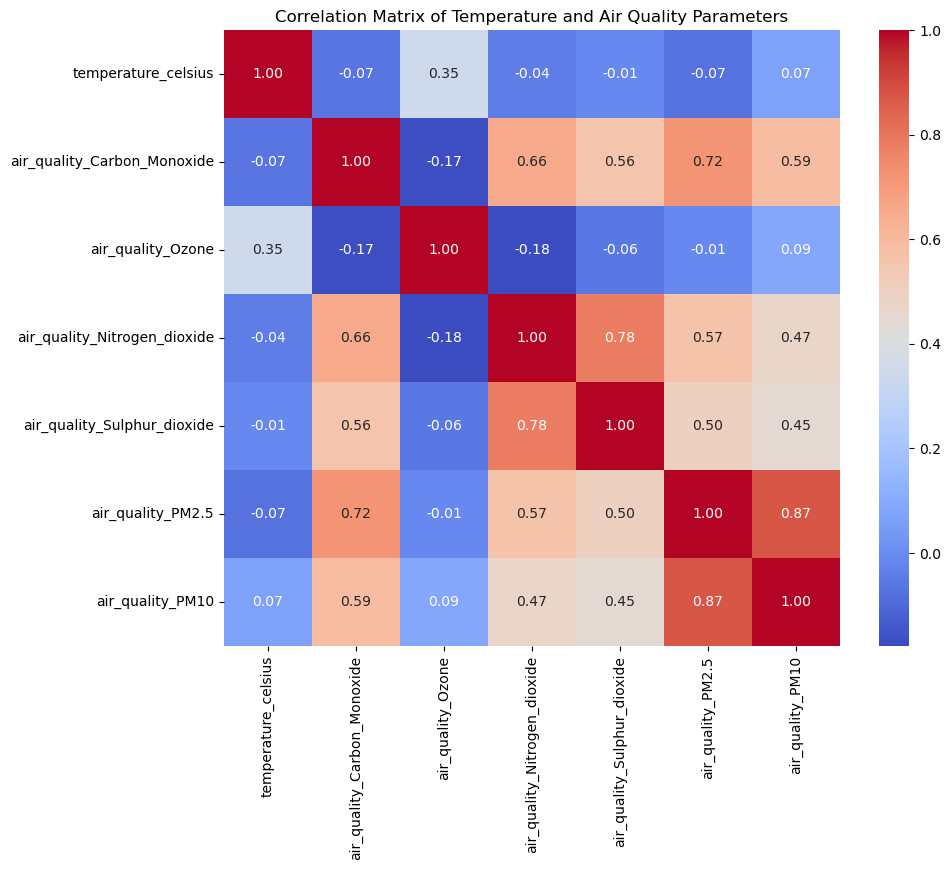

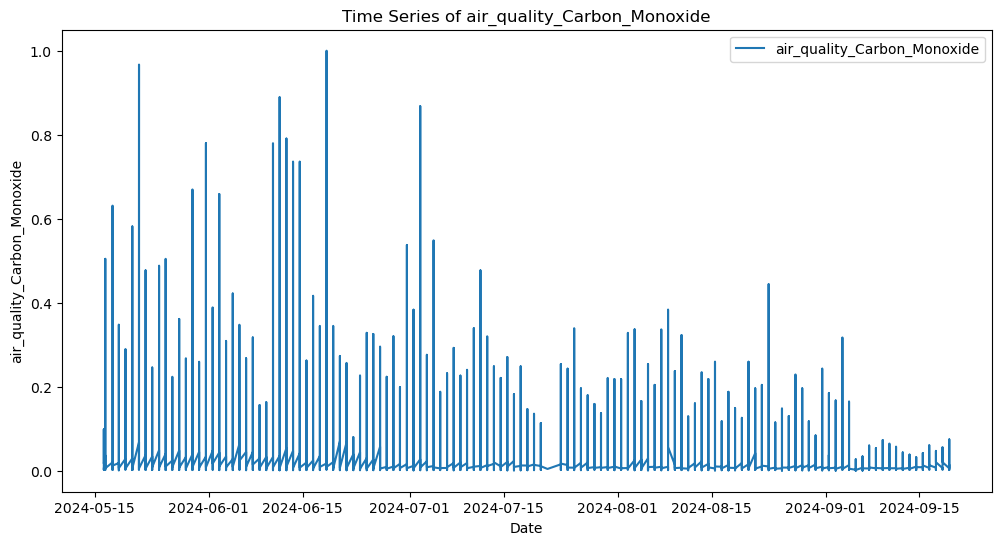

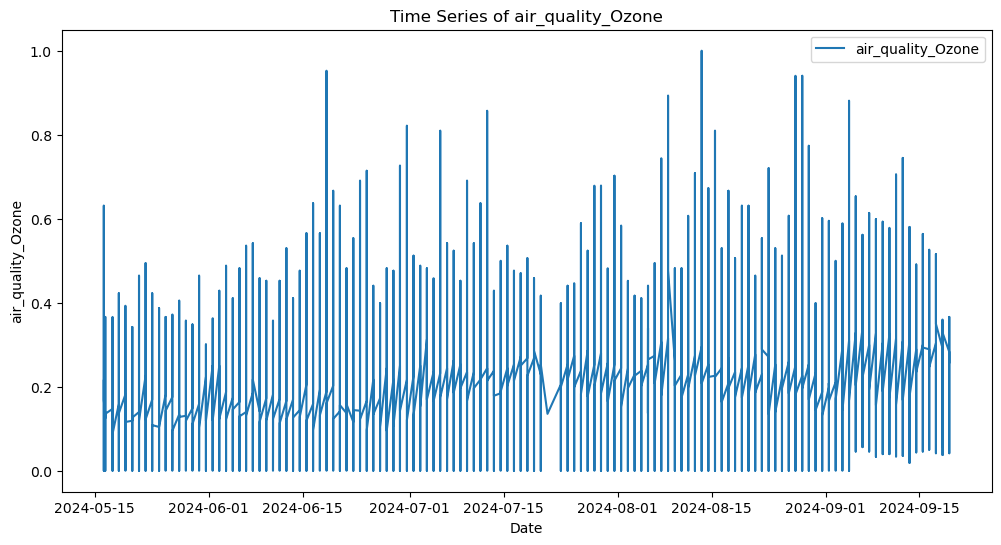

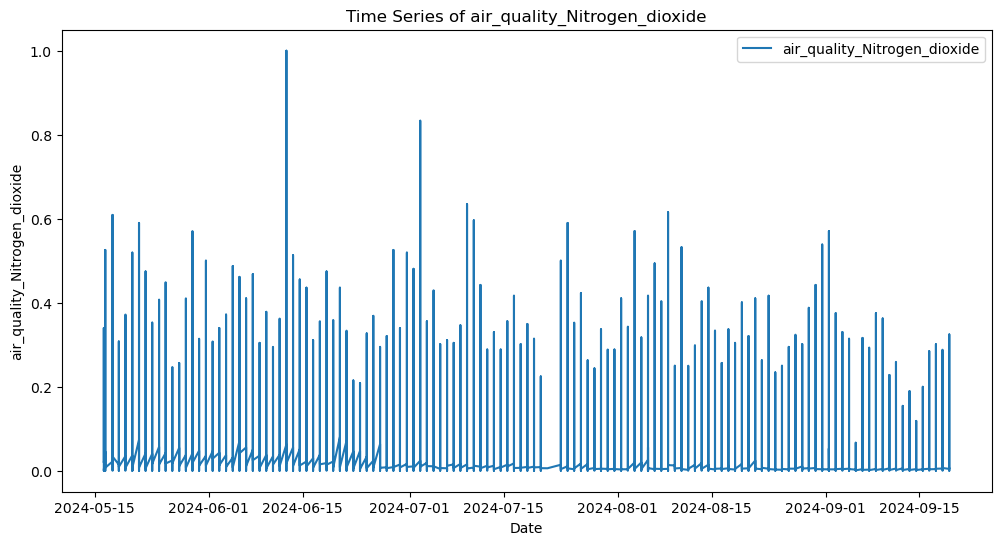

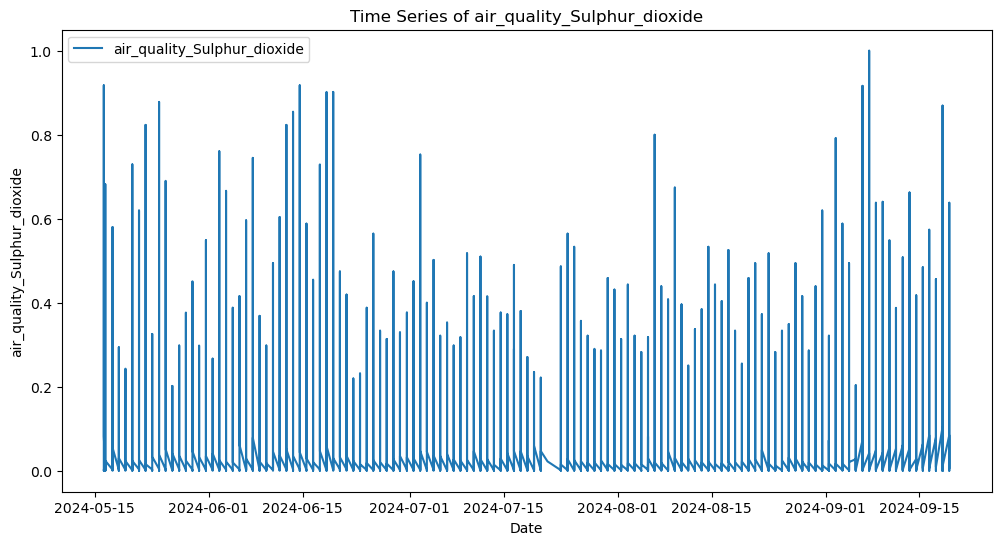

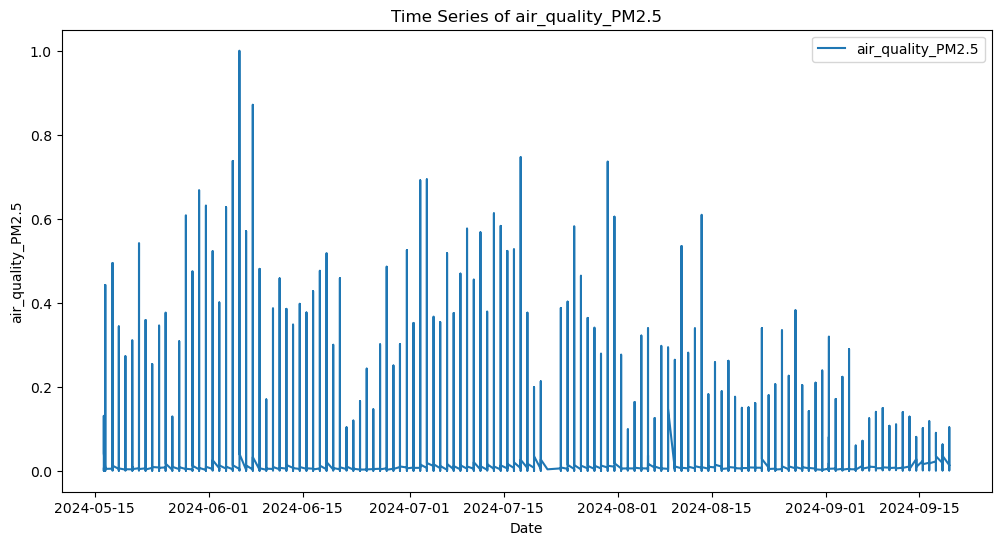

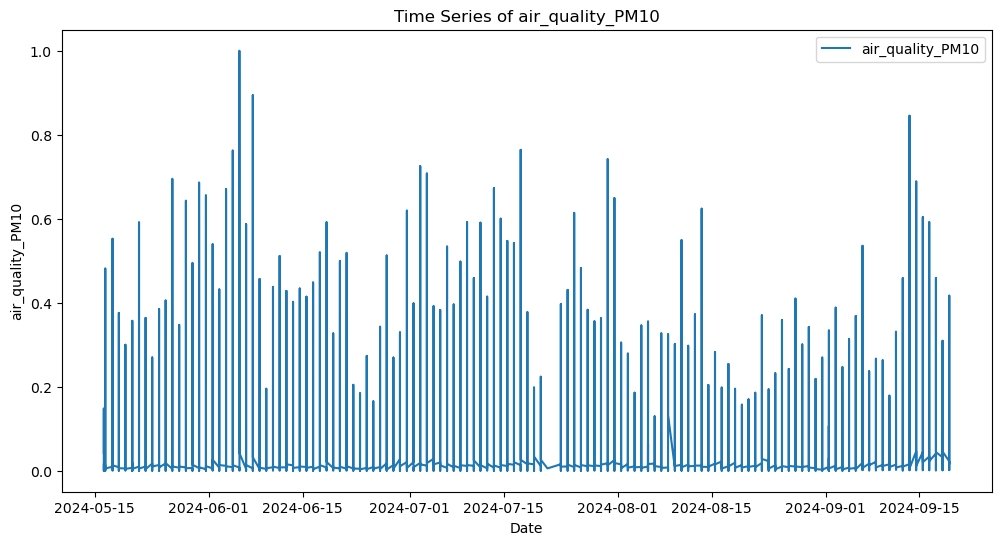

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
data['temperature_celsius'] = pd.to_numeric(data['temperature_celsius'], errors='coerce')


# Convert 'last_updated_epoch' to datetime
data['last_updated'] = pd.to_datetime(data['last_updated_epoch'], unit='s')

# Set 'last_updated' as index
data.set_index('last_updated', inplace=True)

# Select relevant air quality and weather parameters
air_quality_cols = [
    'air_quality_Carbon_Monoxide', 
    'air_quality_Ozone', 
    'air_quality_Nitrogen_dioxide', 
    'air_quality_Sulphur_dioxide', 
    'air_quality_PM2.5', 
    'air_quality_PM10'
]

# Analyze correlation between temperature and air quality
correlation_data = data[['temperature_celsius'] + air_quality_cols].dropna()
correlation_matrix = correlation_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Temperature and Air Quality Parameters')
plt.show()

# Optional: Time series analysis of specific air quality parameters
for col in air_quality_cols:
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data[col], label=col)
    plt.title(f'Time Series of {col}')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.legend()
    plt.show()


## Correlation Matrix of Temperature and Air Quality Parameters

### Key Observations:
1. **Temperature Correlation**:
   - Temperature (Celsius) shows a **moderate positive correlation** (0.35) with Ozone levels, indicating that as temperature rises, Ozone levels tend to increase.
   - There is **very little correlation** between temperature and other air quality parameters like Carbon Monoxide, Nitrogen Dioxide, and Sulphur Dioxide.

2. **Carbon Monoxide Correlation**:
   - Carbon Monoxide has a **strong positive correlation** with Nitrogen Dioxide (0.66) and PM2.5 (0.72). This suggests that higher levels of Carbon Monoxide are often associated with increased Nitrogen Dioxide and PM2.5 levels.
   - There is a **moderate correlation** between Carbon Monoxide and Sulphur Dioxide (0.56), showing these pollutants are often found together.

3. **Ozone Correlation**:
   - Ozone has a **low to moderate negative correlation** with most other pollutants, such as Nitrogen Dioxide (-0.18), indicating that when Ozone increases, some of these pollutants decrease.

4. **Nitrogen Dioxide Correlation**:
   - Nitrogen Dioxide has a **strong correlation** with Sulphur Dioxide (0.78), PM2.5 (0.57), and PM10 (0.47), showing that these pollutants tend to increase together.

5. **PM2.5 and PM10 Correlation**:
   - There is a **very strong correlation** between PM2.5 and PM10 (0.87), indicating that they usually vary together, as they are both particulate matter.

---

## Time Series of Air Quality Parameters

### 1. **Carbon Monoxide (CO)**:
   - The time series shows **high peaks** in Carbon Monoxide levels around June 2024, followed by a gradual decline towards August and September.
   - There are several spikes, especially around early and mid-June, suggesting short periods of elevated CO levels during this time.
   
### 2. **Ozone (O3)**:
   - Ozone levels increase steadily from May to mid-July, with **multiple sharp peaks** throughout the time period.
   - Ozone levels seem to fluctuate more significantly in the **summer months**, with many high spikes in June and July, and more consistent lower levels after that.

### 3. **Nitrogen Dioxide (NO2)**:
   - Nitrogen Dioxide shows a **similar pattern** to Carbon Monoxide, with elevated levels during June, followed by a decline towards late summer.
   - The **highest peaks** occur around early June, with decreasing intensity as time progresses.

### 4. **Sulphur Dioxide (SO2)**:
   - Sulphur Dioxide levels follow a **cyclical pattern**, with multiple sharp increases followed by rapid drops.
   - The most prominent peaks appear in June and early September, indicating periods of high Sulphur Dioxide levels during these months.

### 5. **PM2.5**:
   - PM2.5 levels show **high variability** throughout May and June, with multiple significant peaks around June.
   - The levels tend to drop in July and August, with fewer large spikes, suggesting lower pollution in these months.

### 6. **PM10**:
   - PM10 follows a pattern similar to PM2.5, with **high peaks** in May and June, and a general decline in variability in August and September.
   - Like PM2.5, it shows higher concentrations in the earlier months of the time series.

---

## Summary Insights:
- The **correlation matrix** shows that several pollutants are highly correlated with each other, especially **Carbon Monoxide, Nitrogen Dioxide, PM2.5, and PM10**, indicating that these pollutants often increase together.
- **Temperature** seems to correlate most with **Ozone**, suggesting a link between higher temperatures and increased Ozone levels.
- The **time series plots** show that most air pollutants tend to have higher levels in **May and June**, with some pollutants like **Carbon Monoxide and Nitrogen Dioxide** showing a marked decline toward August and September.
- **Ozone levels** appear to be more consistently high during the **warmer months**, with frequent spikes, especially in June and July.

This analysis highlights seasonal trends and correlations in air quality, with elevated pollution levels during specific months and strong interrelationships among certain pollutants.


## Feature Importance:

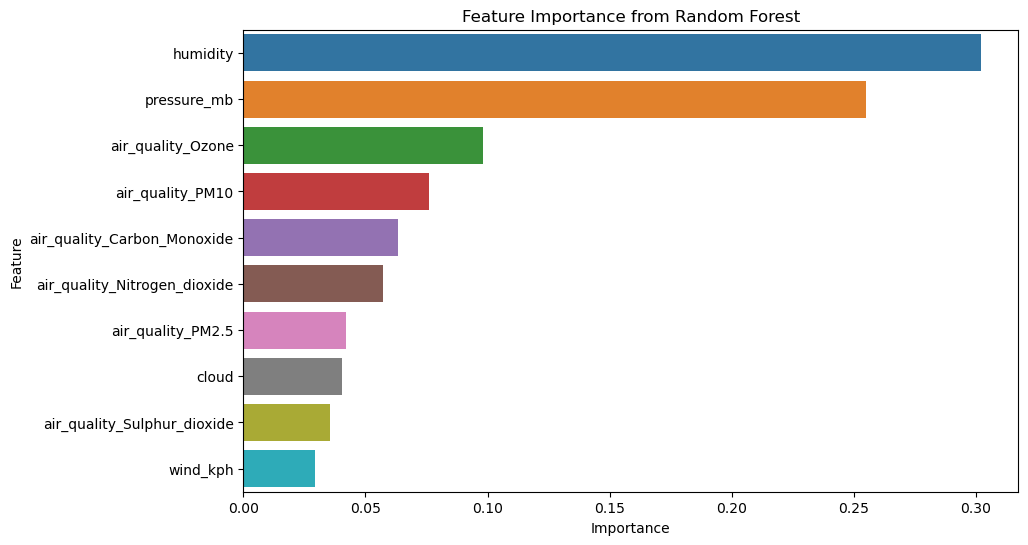

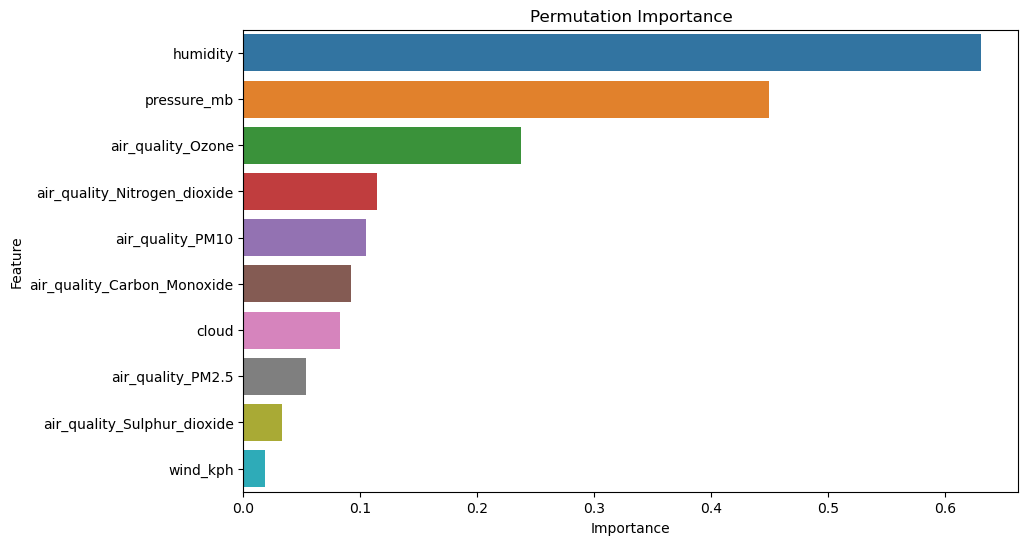

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

# Convert target variable to numeric
data['temperature_celsius'] = pd.to_numeric(data['temperature_celsius'], errors='coerce')

# Select features and target variable
features = [
    'wind_kph', 'pressure_mb', 'humidity', 'cloud',
    'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
    'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
    'air_quality_PM2.5', 'air_quality_PM10'
]
target = 'temperature_celsius'

# Print the columns of the DataFrame
# Fill missing values with the mean of each column
data[features] = data[features].fillna(data[features].mean())
data[target] = data[target].fillna(data[target].mean())  # or use median

# Check for missing values in features and target
if data[features].isnull().any().any() or data[target].isnull().any():
    print("Missing values found in features or target. Please handle them before proceeding.")
else:
    # Split data into training and testing sets
    X = data[features]
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Random Forest Regressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Feature importance from the model
    feature_importances = model.feature_importances_

    # Create a DataFrame for plotting
    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    importance_df.sort_values(by='Importance', ascending=False, inplace=True)

    # Plotting feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title('Feature Importance from Random Forest')
    plt.show()

    # Permutation importance
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

    # Create a DataFrame for permutation importance
    perm_importance_df = pd.DataFrame({'Feature': features, 'Importance': perm_importance.importances_mean})
    perm_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

    # Plotting permutation importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=perm_importance_df)
    plt.title('Permutation Importance')
    plt.show()


## Feature Importance from Random Forest Model

### 1. Humidity:
- **Humidity** is the most important feature, with a high importance score (~0.30). This suggests that humidity plays a significant role in predicting the target variable in the Random Forest model.
  
### 2. Pressure (mb):
- **Pressure (mb)** follows closely behind humidity in terms of importance (~0.25). Pressure is another key environmental factor affecting the target.

### 3. Air Quality (Ozone):
- **Air Quality - Ozone** comes third in the importance rankings (~0.12), showing a moderate contribution to the model's predictions.

### 4. Air Quality (PM10):
- **Air Quality - PM10** also has a moderate importance (~0.10), highlighting the impact of particulate matter on the target variable.

### 5. Carbon Monoxide (CO):
- **Carbon Monoxide** ranks next (~0.08), suggesting it has a smaller but still significant effect on the model's predictions.

### 6. Nitrogen Dioxide (NO2):
- **Nitrogen Dioxide** has a lower importance (~0.07) but is still relevant in predicting the target outcome.

### 7. Cloud Cover:
- **Cloud cover** is another factor (~0.05), though less important compared to air quality measures.

### 8. PM2.5:
- **PM2.5** has a smaller importance (~0.05), indicating a relatively lower contribution to the model.

### 9. Sulphur Dioxide (SO2):
- **Sulphur Dioxide** has a minor role (~0.03), meaning its effect on the target prediction is limited.

### 10. Wind (kph):
- **Wind speed** has the least importance (~0.02), suggesting it has minimal impact on the Random Forest model.

---

## Permutation Importance

### 1. Humidity:
- **Humidity** again ranks as the most important feature with an even higher score (~0.60), confirming its strong influence on the target variable.

### 2. Pressure (mb):
- **Pressure (mb)** maintains its position as the second most important feature (~0.50), showing consistency across both importance methods.

### 3. Air Quality (Ozone):
- **Air Quality - Ozone** follows the same pattern (~0.25), confirming its moderate impact on the target variable.

### 4. Nitrogen Dioxide (NO2):
- **Nitrogen Dioxide** ranks fourth (~0.15), slightly more important in this method compared to the Random Forest feature importance.

### 5. PM10:
- **PM10** remains important (~0.12), but its score is lower in permutation importance compared to Random Forest feature importance.

### 6. Carbon Monoxide (CO):
- **Carbon Monoxide** also appears (~0.08), but with a slightly lower importance than in the Random Forest feature importance.

### 7. Cloud Cover:
- **Cloud cover** contributes (~0.07), consistent with its ranking in the Random Forest importance.

### 8. PM2.5:
- **PM2.5** has similar importance (~0.05), indicating its lesser role in influencing the model.

### 9. Sulphur Dioxide (SO2):
- **Sulphur Dioxide** again ranks low (~0.03), suggesting limited impact on the model's outcome.

### 10. Wind (kph):
- **Wind speed** consistently shows minimal importance (~0.01), aligning with its ranking in the Random Forest importance plot.

---

## Summary Insights:
- **Humidity** and **Pressure (mb)** are consistently the top features in both Random Forest feature importance and permutation importance, indicating their strong influence on the model's predictions.
- **Ozone**, **PM10**, and **Carbon Monoxide** also show moderate importance, highlighting the relevance of air quality in predicting the target variable.
- **Wind speed**, **Sulphur Dioxide**, and **PM2.5** consistently show low importance, indicating they play a smaller role in the model.

Both methods offer complementary insights into the importance of different features, with similar trends across the two plots.


In [ ]:
pip install plotly

## Spatial Analysis:

In [49]:
import pandas as pd
import plotly.express as px

# Assuming 'data' is your DataFrame with the relevant columns
data['latitude'] = pd.to_numeric(data['latitude'], errors='coerce')
data['longitude'] = pd.to_numeric(data['longitude'], errors='coerce')
data['temperature_celsius'] = pd.to_numeric(data['temperature_celsius'], errors='coerce')

# Copy the original data into a dummy dataset
dummy_data = data.copy()

# Update the dummy dataset by clipping negative temperature values to 0
dummy_data['temperature_celsius'] = dummy_data['temperature_celsius'].clip(lower=0)


# Create a scatter map
fig = px.scatter_geo(dummy_data,
                     lat='latitude',
                     lon='longitude',
                     hover_name='country',
                     size='temperature_celsius',
                     projection='natural earth',
                     title='Geographical Patterns in Weather Data',
                     color='temperature_celsius',
                     color_continuous_scale=px.colors.sequential.Plasma)

# Show the figure
fig.show()


### Key Insights from the Map:
- This visualization allows users to observe **global temperature patterns** at a glance.
- Regions with **high temperatures** are easily identified by their larger point sizes and warmer colors, while regions with **lower temperatures** have smaller points and cooler colors.
- The map can help highlight **temperature clusters** or anomalies, such as unusually high or low temperatures in specific geographical areas.

Overall, this interactive map offers a visually rich way to explore geographical variations in temperature data, combining size, color, and hover features to convey information effectively.

## Geographical Patterns:

/Users/krishnavamsi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from current font.

/Users/krishnavamsi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 40481 (\N{CJK UNIFIED IDEOGRAPH-9E21}) missing from current font.



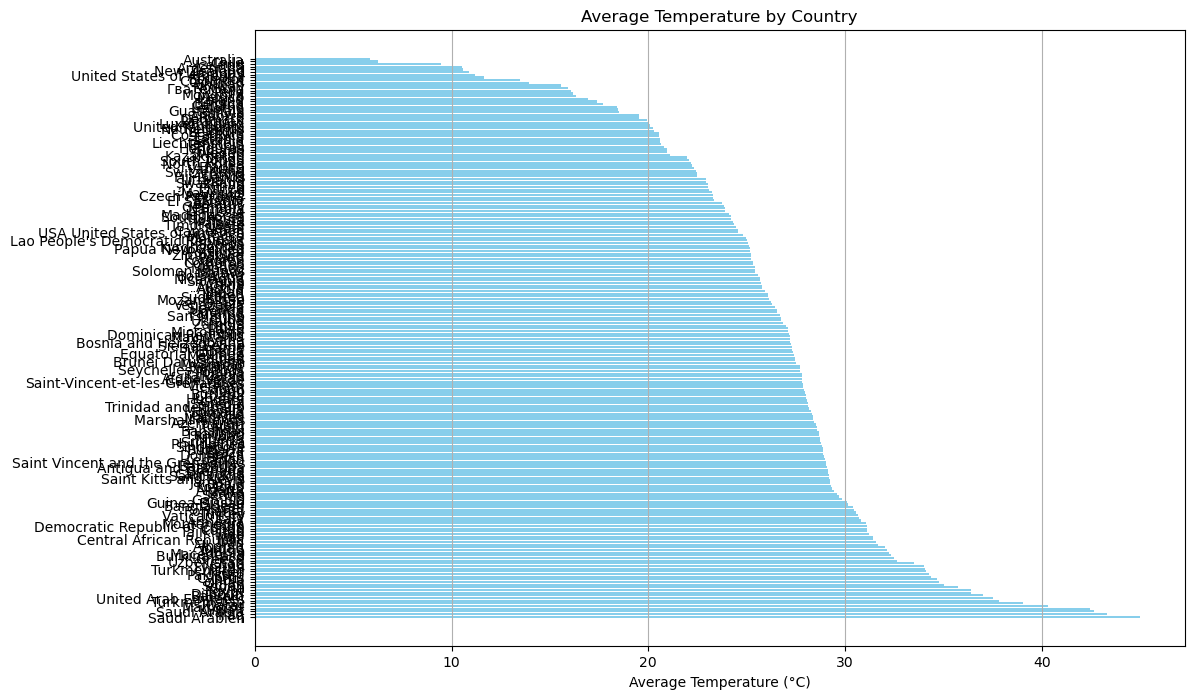

           country  temperature_celsius
157  Saudi Arabien            45.000000
80            Iraq            43.280159
156   Saudi Arabia            42.616000
93          Kuwait            42.462698
113       Marrocos            40.300000
..             ...                  ...
129    New Zealand            10.576984
6        Argentina            10.530400
75         Iceland             9.480159
35           Chile             6.262698
8        Australia             5.838889

[210 rows x 2 columns]


In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert temperature to numeric, if necessary
data['temperature_celsius'] = pd.to_numeric(data['temperature_celsius'], errors='coerce')

# Group by country and calculate the average temperature
country_summary = data.groupby('country')['temperature_celsius'].mean().reset_index()

# Sort countries by average temperature
country_summary.sort_values(by='temperature_celsius', ascending=False, inplace=True)

# Plotting the average temperature per country
plt.figure(figsize=(12, 8))
plt.barh(country_summary['country'], country_summary['temperature_celsius'], color='skyblue')
plt.xlabel('Average Temperature (°C)')
plt.title('Average Temperature by Country')
plt.grid(axis='x')
plt.show()

# Display the summary table
print(country_summary)


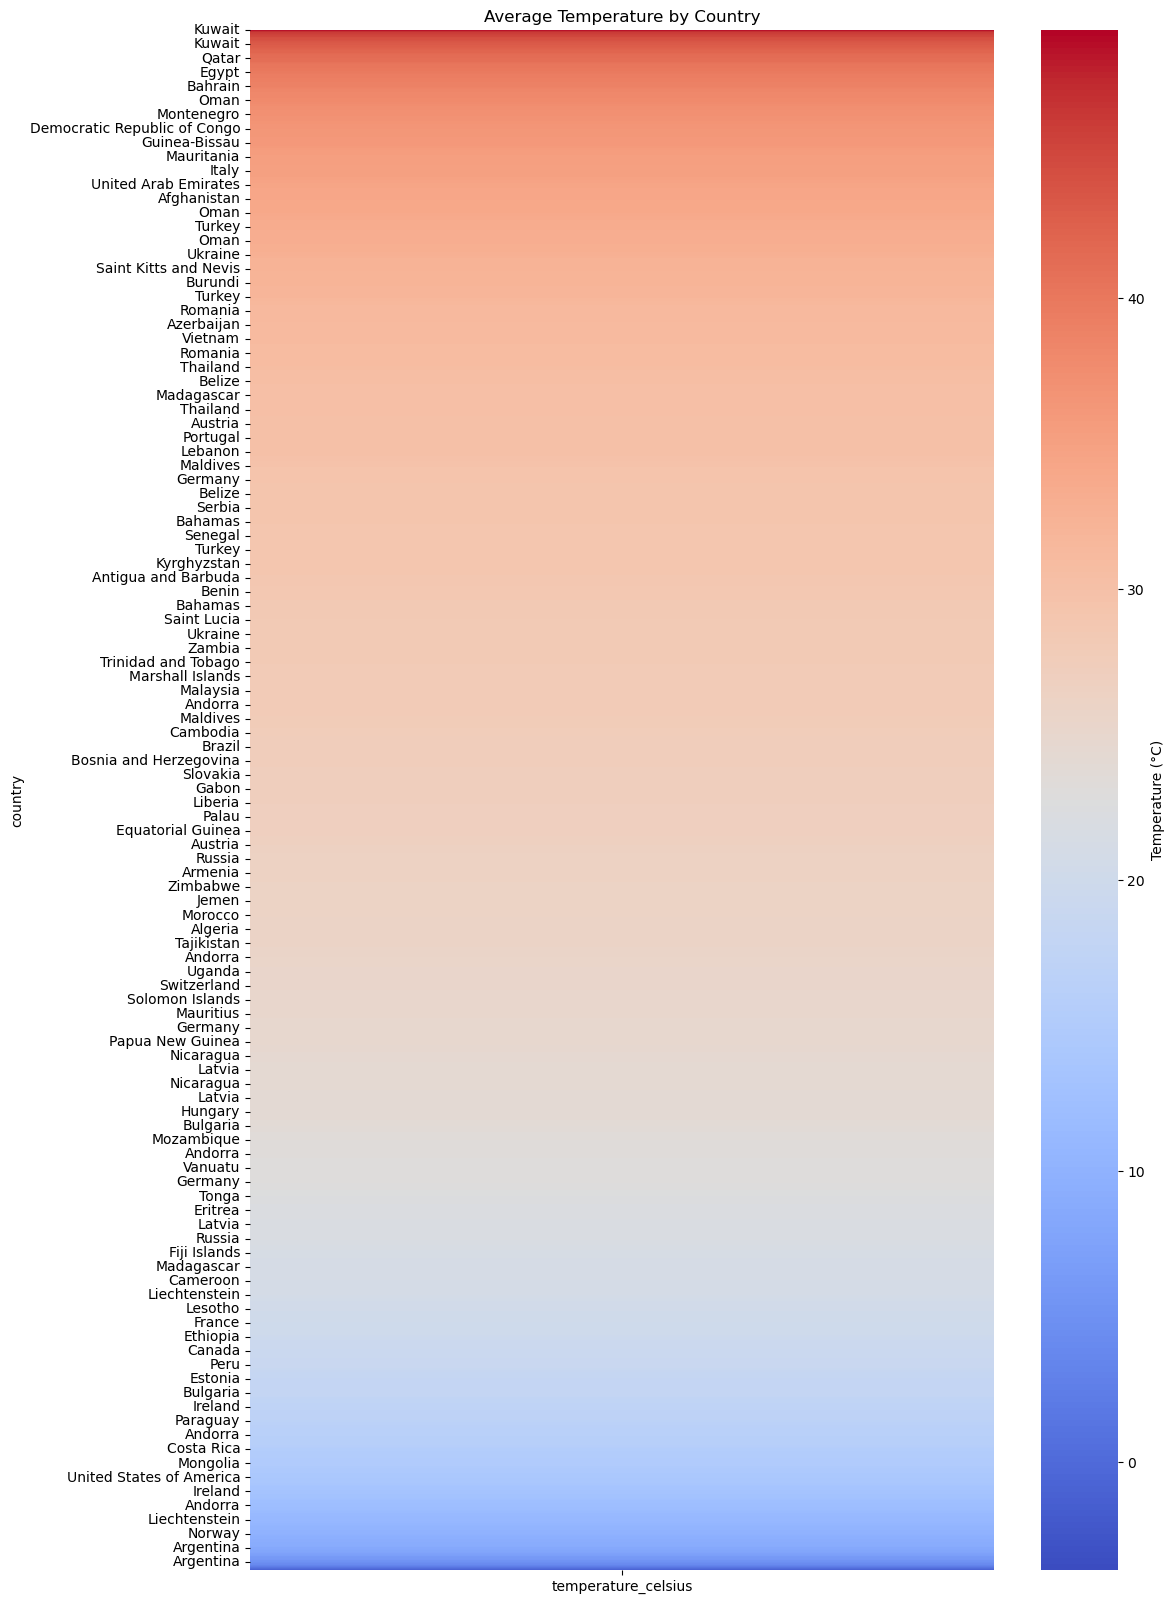

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort countries by average temperature
data.sort_values(by='temperature_celsius', ascending=False, inplace=True)

# Plot a heatmap of the temperatures
plt.figure(figsize=(12, 20))  # Adjust figure size for a large dataset
sns.heatmap(data[['temperature_celsius']].set_index(data['country']),
            cmap='coolwarm',  # Color map for temperature gradient
            cbar_kws={'label': 'Temperature (°C)'})  # Color bar with label
plt.title('Average Temperature by Country')
plt.show()


In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort countries by average temperature
data.sort_values(by='temperature_celsius', ascending=False, inplace=True)

# Get top 5 and bottom 5 countries
top_5 = data.head(5)
bottom_5 = data.tail(5)

# Output the top 5 and bottom 5 countries as data tables
print("Top 5 Countries:")
print(top_5[['country', 'temperature_celsius']])
print("\nBottom 5 Countries:")
print(bottom_5[['country', 'temperature_celsius']])


Top 5 Countries:
                    country  temperature_celsius
last_updated                                    
2024-06-19 13:45:00  Kuwait                 49.2
2024-06-22 13:45:00    Iraq                 49.1
2024-07-11 12:45:00    Iraq                 49.1
2024-06-27 13:15:00  Kuwait                 48.9
2024-07-12 12:45:00    Iraq                 48.8

Bottom 5 Countries:
                       country  temperature_celsius
last_updated                                       
2024-05-19 14:00:00  Australia                 -1.0
2024-07-01 13:15:00  Australia                 -1.6
2024-07-07 13:00:00      Chile                 -1.7
2024-06-12 14:15:00  Australia                 -1.9
2024-06-19 13:45:00  Australia                 -3.7


# Analysis of Average Temperature by Country

## 1. Top 5 Hottest Countries
The top 5 countries with the highest recorded temperatures are as follows:

| Country  | Temperature (°C) | Date                    |
|----------|------------------|-------------------------|
| Kuwait   | 49.2°C            | June 19, 2024 13:45     |
| Iraq     | 49.1°C            | June 22, 2024 13:45     |
| Iraq     | 49.1°C            | July 11, 2024 12:45     |
| Kuwait   | 48.9°C            | June 27, 2024 13:15     |
| Iraq     | 48.8°C            | July 12, 2024 12:45     |

These countries, primarily in the Middle East, are known for their extremely high summer temperatures due to their desert climates.

## 2. Bottom 5 Coldest Countries
The bottom 5 countries with the lowest recorded temperatures are:

| Country     | Temperature (°C) | Date                    |
|-------------|------------------|-------------------------|
| Australia   | -3.7°C            | June 19, 2024 13:45     |
| Australia   | -1.9°C            | June 12, 2024 14:15     |
| Chile       | -1.7°C            | July 7, 2024 13:00      |
| Australia   | -1.6°C            | July 1, 2024 13:15      |
| Australia   | -1.0°C            | May 19, 2024 14:00      |

Despite Australia's reputation for hot summers, its winter months bring cold temperatures, particularly in southern regions. Chile, especially in its southern and mountainous areas, also experiences cold winters.

## 3. General Insights
- **Temperature Extremes**: The difference between the hottest and coldest temperatures is significant, with Kuwait at 49.2°C and Australia at -3.7°C. This demonstrates the diversity of climates globally.
- **Middle East Heat**: Kuwait and Iraq consistently appear among the hottest countries, showcasing their extreme summer heat.
- **Southern Hemisphere Winter**: Countries in the Southern Hemisphere, like Australia and Chile, dominate the coldest temperatures, reflecting their winter season during mid-2024.

## 4. Visualization Analysis
The heatmap-style visualization provides a clear depiction of temperature gradients across countries:
- **Red hues** signify the highest temperatures, with Kuwait, Iraq, and other Middle Eastern countries showing the warmest climates.
- **Blue hues** indicate the coldest temperatures, with Australia and Chile featuring prominently at the colder end of the spectrum.

This visual representation highlights the wide range of climate patterns across different regions during mid-2024.

